In [1]:
import pandas as pd 

df = pd.read_csv('C:/users/Stewa/Documents/Downloads/steam-store-games/steam.csv')
df = df.dropna() # drop nulls, only one row had any, so im just dropping it

df.head() # take a peek at the data


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,124534.0,3339.0,17612.0,317.0,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,3318.0,633.0,277.0,62.0,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.0,3416.0,398.0,187.0,34.0,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.0,1273.0,267.0,258.0,184.0,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.0,5250.0,288.0,624.0,415.0,5000000-10000000,3.99


In [2]:
# make a new feature for overall rating

import numpy as np # need for sqrt 
pos_neg = (df['positive_ratings'] - df['negative_ratings'])**2 # **2 so I dont get negatives
df['overall_rating'] = np.sqrt(pos_neg) / df['positive_ratings'] * 100 # undo square, convert to scale of 100
df['overall_rating'].head(1) # validate

0    97.318805
Name: overall_rating, dtype: float64

In [3]:
df.T.head(20)

,0,1,2,3,4,5,6,7,8,9,...,4509,4510,4511,4512,4513,4514,4515,4516,4517,4518
appid,10,20,30,40,50,60,70,80,130,220,...,341080,341090,341120,341150,341160,341260,341270,341290,341310,341360
name,Counter-Strike,Team Fortress Classic,Day of Defeat,Deathmatch Classic,Half-Life: Opposing Force,Ricochet,Half-Life,Counter-Strike: Condition Zero,Half-Life: Blue Shift,Half-Life 2,...,NeXus: One Core,On A Roll 3D,Glorkian Warrior: The Trials Of Glork,Age of Fear 2: The Chaos Lord GOLD,Steam Heroes,Isaac the Adventurer,Samphi,Lazors,Greyfox RPG,Paparazzi
release_date,2000-11-01,1999-04-01,2003-05-01,2001-06-01,1999-11-01,2000-11-01,1998-11-08,2004-03-01,2001-06-01,2004-11-16,...,2015-02-26,2015-02-12,2015-03-24,2015-03-27,2015-01-30,2015-03-02,2016-03-18,2016-09-25,2015-02-23,2015-02-17
english,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
developer,Valve,Valve,Valve,Valve,Gearbox Software,Valve,Valve,Valve,Gearbox Software,Valve,...,Hyde Games,Battenberg Software,Pixeljam,Leslaw Sliwko,ProjectorGames,Artisiti;Studio Vrtinec,Greeny Games Studio,Pyrosphere,Lesley Dodd,Pringo Dingo Games
publisher,Valve,Valve,Valve,Valve,Valve,Valve,Valve,Valve,Valve,Valve,...,BulkyPix,Battenberg Software,None,Age of Fear,KISS ltd,Artisiti,Greeny Games Studio,Pyrosphere,EQ Games,Pringo Dingo Games
platforms,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,windows;mac;linux,...,windows,windows;mac;linux,windows;mac,windows;mac;linux,windows,windows;mac,windows,windows;mac;linux,windows,windows;mac;linux
required_age,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
categories,Multi-player;Online Multi-Player;Local Multi-P...,Multi-player;Online Multi-Player;Local Multi-P...,Multi-player;Valve Anti-Cheat enabled,Multi-player;Online Multi-Player;Local Multi-P...,Single-player;Multi-player;Valve Anti-Cheat en...,Multi-player;Online Multi-Player;Valve Anti-Ch...,Single-player;Multi-player;Online Multi-Player...,Single-player;Multi-player;Valve Anti-Cheat en...,Single-player,Single-player;Steam Achievements;Steam Trading...,...,Single-player;Co-op;Shared/Split Screen;Partia...,Single-player;Steam Achievements;Full controll...,Single-player;Steam Achievements;Full controll...,Single-player;Multi-player;Local Multi-Player;...,Single-player;Steam Trading Cards;Partial Cont...,Single-player;Stats,Single-player;Steam Trading Cards;Steam Cloud,Single-player;Steam Achievements;Steam Trading...,Single-player;Steam Achievements;Full controll...,Single-player;Multi-player;Steam Achievements;...
genres,Action,Action,Action,Action,Action,Action,Action,Action,Action,Action,...,Action,Action;Adventure;Casual;Indie,Indie,Indie;RPG;Strategy,Action;Adventure;Casual;Indie,Action;Adventure;Casual;Indie,Indie;RPG;Early Access,Casual;Indie,Adventure;Indie;RPG,Action;Indie


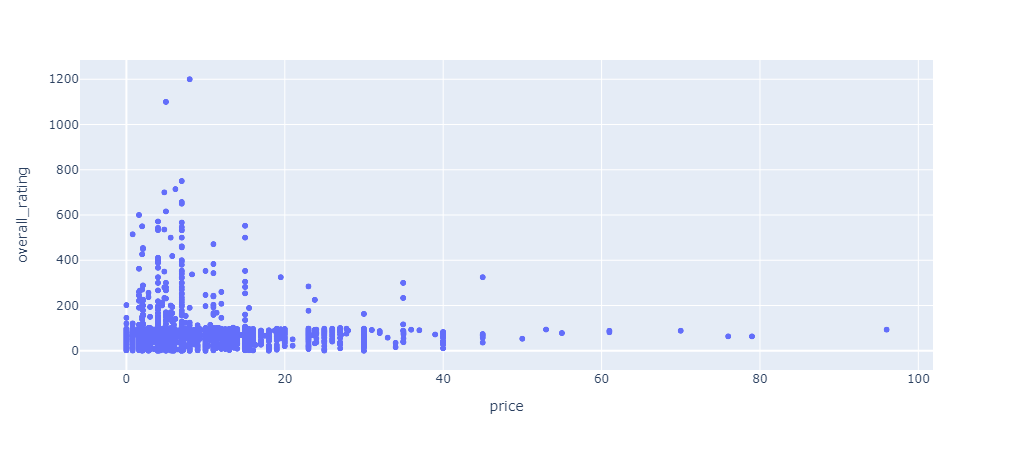

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as plt
plt.offline.init_notebook_mode(connected=True)

fig = px.scatter(df, x='price', y='overall_rating',
          hover_name=df['name'], size_max=50);
fig.show()

In [6]:
target = 'price'
features = [ 'genres', 'platforms', 'achievements', 'english', 'publisher', 'steamspy_tags']

# break up my dataset
# first, I need to cast release_date to dt format
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)
train = df.loc[(df['release_date'] <= pd.datetime(2014,12,31)) 
                     & (df['release_date'] >= pd.datetime(1997,1,1))]

val = df.loc[(df['release_date'] >= pd.datetime(2015,1,1))
                   & (df['release_date'] <= pd.datetime(2016,12,31))] 

test = df.loc[(df['release_date'] >= pd.datetime(2017,1,1))
                   & (df['release_date'] <= pd.datetime(2019,12,31))]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [8]:
import category_encoders as ce
import plotly.express as px
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

X = df[[ 'genres', 'platforms', 'achievements', 'english', 'publisher', 'steamspy_tags']]
y = df['price']

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=100, n_jobs=-1)
)
pipeline.fit(X, y)

C:\Users\stewa\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

C:\Users\stewa\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[18:24:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['genres', 'platforms', 'publisher',
                                      'steamspy_tags'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'genres',
                                          'data_type': dtype('O'),
                                          'mapping': Action                                                                                 1
Action;Free to Play                                                                    2
Action;Free to Play;Strategy                                                           3
Action;Adventure                                                                       4
Indie                                                                                  5
                                                       